In [1]:
import numpy as np
import pandas as pd
import os
import pydotplus

from sklearn import datasets
from IPython.display import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

In [2]:
import graphviz
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [9]:
tennis_data = pd.read_csv('../../data/playTennis.csv')
tennis_data

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [12]:
tennis_data.outlook = tennis_data.outlook.replace('Sunny',0)
tennis_data.outlook = tennis_data.outlook.replace('Overcast',0)
tennis_data.outlook = tennis_data.outlook.replace('Rain',0)

tennis_data.temp = tennis_data.temp.replace('Hot',3)
tennis_data.temp = tennis_data.temp.replace('Mild',3)
tennis_data.temp = tennis_data.temp.replace('Cool',3)

tennis_data.humidity = tennis_data.humidity.replace('High',6)
tennis_data.humidity = tennis_data.humidity.replace('Normal',7)

tennis_data.wind = tennis_data.wind.replace('Weak', 8)
tennis_data.wind = tennis_data.wind.replace('Strong', 9)

tennis_data.play = tennis_data.play.replace('No', 10)
tennis_data.play = tennis_data.play.replace('Yes', 11)

tennis_data

,outlook,temp,humidity,wind,play
0,0,3,6,8,10
1,0,3,6,9,10
2,0,3,6,8,11
3,0,3,6,8,11
4,0,3,7,8,11
5,0,3,7,9,10
6,0,3,7,9,11
7,0,3,6,8,10
8,0,3,7,8,11
9,0,3,7,8,11


In [14]:
X = np.array(pd.DataFrame(tennis_data, columns=['outlook', 'temp', 'humidity', 'wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['play']))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [104]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [85]:
dt_pred = dt_clf.predict(X_test)

In [86]:
print(confusion_matrix(y_test, dt_pred))

[[0 2]
 [1 1]]


In [87]:
print(classification_report(y_test, dt_pred))

             precision    recall  f1-score   support

         10       0.00      0.00      0.00         2
         11       0.33      0.50      0.40         2

avg / total       0.17      0.25      0.20         4



In [88]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [89]:
target_name = np.array(['Play No', 'Play Yes'])

In [105]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names=feature_names, class_names=target_name, filled = True, 
                                   rounded = True, special_characters = True)

In [106]:
df_graph = pydotplus.graph_from_dot_data(dt_dot_data)

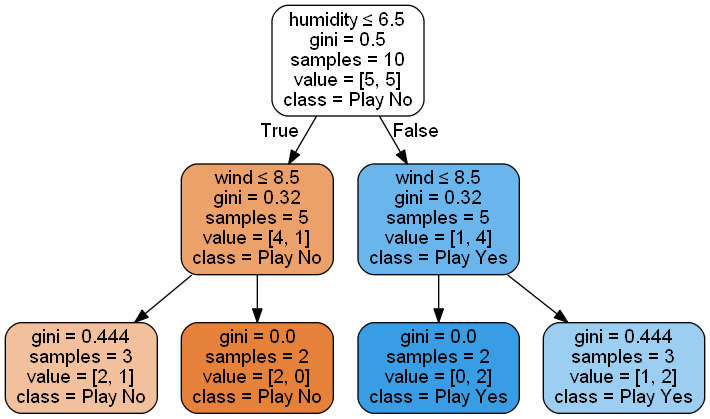

In [107]:
Image(df_graph.create_png())

In [4]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
sc.fit(X_train)


X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuacy : %.2f'% accuracy_score(y_test, y_pred_tr))

Accuacy : 0.98


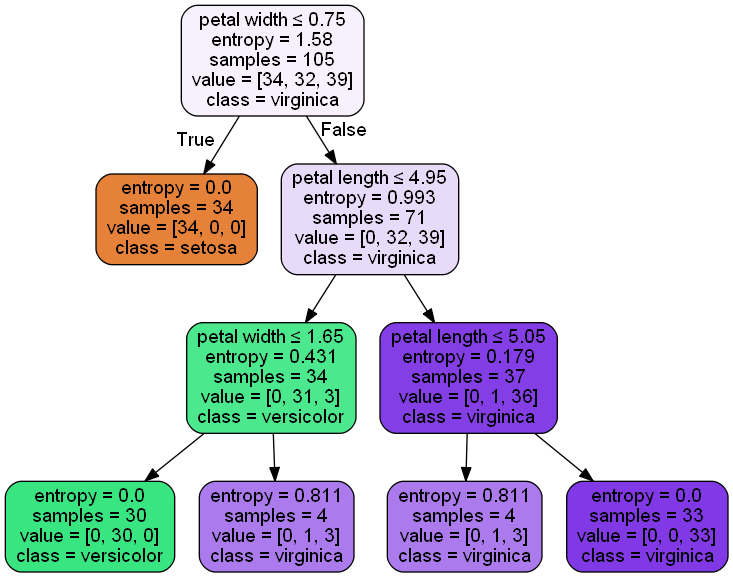

In [14]:
dt_dot_data = tree.export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'], class_names=iris.target_names, 
                                   filled = True, rounded = True, special_characters = True)
df_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(df_graph.create_png())

In [15]:
from sklearn.datasets import load_breast_cancer

In [23]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 0)

In [26]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('TRAIN 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('TEST 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

TRAIN 세트 정확도 : 1.000
TEST 세트 정확도 : 0.912


In [27]:
tree= DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [28]:
export_graphviz(tree, out_file='tree.dot', class_names=['M','B'], feature_names=cancer.feature_names,
               impurity = False, filled = True)

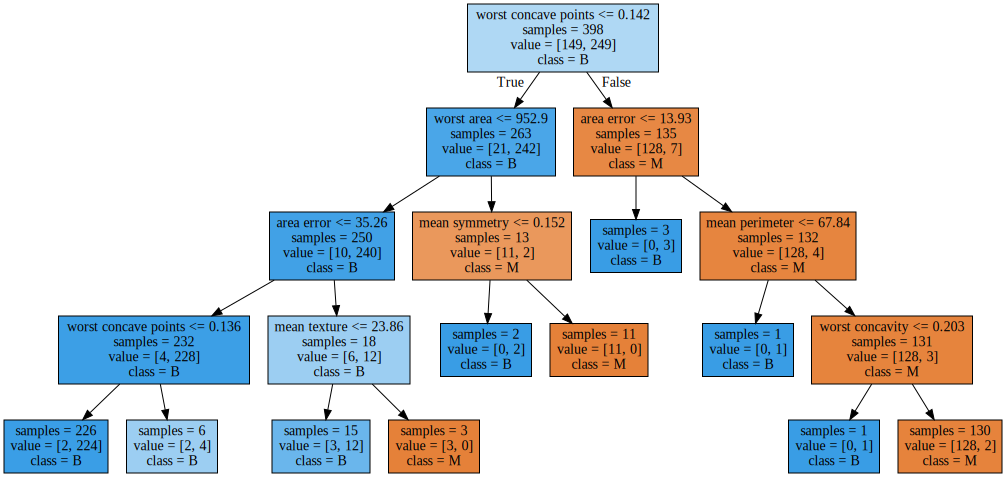

In [29]:
with open('tree.dot','r',encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))